
**Importing Necessary Modules and Understanding Data**


In [35]:
import pandas as pd
import numpy as np

In [36]:
data=pd.read_excel('/content/sample_data/Datset.xlsx')

In [37]:
data.head()

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,...,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
0,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,...,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
1,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,...,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NaN
2,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,...,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
3,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,...,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
4,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,...,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178


In [38]:
data.shape

(5747, 35)

**Dropping Unecessary Columns in the data which don't affect the model Performance**

In [39]:
data.drop(columns=['sid', 'visit_year', 'visit_date'], inplace=True)

In [40]:
data.head()

,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,hr,O2_hours_day,bmi,...,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
0,54.5,Female,White,159.9,73.0,130,80,87,0,28.55,...,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
1,62.3,Female,White,162.6,86.0,170,80,81,8,32.53,...,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NaN
2,65.9,Female,White,162.1,62.8,96,63,66,0,23.90,...,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
3,59.6,Male,White,182.9,110.0,142,88,75,0,32.88,...,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
4,67.5,Male,White,179.1,83.0,106,72,72,10,25.88,...,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178


**Knowing the Categorical attributes and their value counts of labels**

In [41]:
categorical = list(data.select_dtypes(include=['object']).columns.values)
for cat in categorical:
  print(data[cat].value_counts())

Male      2885
Female    2862
Name: gender, dtype: int64
White                        4010
Black or African American    1737
Name: race, dtype: int64
No         4327
Yes        1040
unknown     380
Name: asthma, dtype: int64
No         2845
Yes        2417
unknown     485
Name: bronchitis_attack, dtype: int64
No         3394
Yes        2070
unknown     283
Name: pneumonia, dtype: int64
No         4422
Yes         875
unknown     450
Name: chronic_bronchitis, dtype: int64
No         4260
Yes        1077
unknown     410
Name: emphysema, dtype: int64
No         3775
Yes        1572
unknown     400
Name: copd, dtype: int64
No         4253
Yes         892
unknown     601
missing       1
Name: sleep_apnea, dtype: int64
Former smoker     2912
Current smoker    2759
Never smoked        76
Name: smoking_status, dtype: int64


**Dropping the 7 columns to make data easily split in to Bins**

In [42]:
data=data.drop(data.tail(7).index)

**Binning**

In [43]:
def replace_with_mode(bin_data):
  counts=bin_data.value_counts()
  if counts.get(1,0) > counts.get(0,0):
    return bin_data.replace(2,1)
  else:
    return bin_data.replace(2,0)

**Label Encoding of Categorical attributes and replacing the unknown values with mode value in the binning**

In [44]:
num_bins=82
bin_size=int(np.ceil(len(data)/num_bins))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical = list(data.select_dtypes(include=['object']).columns.values)
for cat in categorical:
  data[cat] = le.fit_transform(data[cat])
  if cat!='smoking_status':
    data[cat]=data.groupby(np.arange(len(data))//bin_size)[cat].apply(replace_with_mode)
    print(data[cat].value_counts())

<ipython-input-44-909cce0b99ea>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data[cat]=data.groupby(np.arange(len(data))//bin_size)[cat].apply(replace_with_mode)
<ipython-input-44-909cce0b99ea>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data[cat]=data.groupby(np.arange(len(data))//bi

1    2880
0    2860
Name: gender, dtype: int64
1    4010
0    1730
Name: race, dtype: int64
0    4703
1    1037
Name: asthma, dtype: int64


<ipython-input-44-909cce0b99ea>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data[cat]=data.groupby(np.arange(len(data))//bin_size)[cat].apply(replace_with_mode)
<ipython-input-44-909cce0b99ea>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data[cat]=data.groupby(np.arange(len(data))//bi

0    3141
1    2599
Name: bronchitis_attack, dtype: int64
0    3667
1    2073
Name: pneumonia, dtype: int64
0    4866
1     874
Name: chronic_bronchitis, dtype: int64
0    4663
1    1077
Name: emphysema, dtype: int64
0    4159
1    1581
Name: copd, dtype: int64
0    4249
1     891
3     600
Name: sleep_apnea, dtype: int64


<ipython-input-44-909cce0b99ea>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data[cat]=data.groupby(np.arange(len(data))//bin_size)[cat].apply(replace_with_mode)
<ipython-input-44-909cce0b99ea>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data[cat]=data.groupby(np.arange(len(data))//bi

**Finding the top features using Recursive Feature Elimination and replacing the Null values with Simple Imputer Function**

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Defining the target variable and the predictor variables
target = 'copd'
predictors = [col for col in data.columns if col != target]

num_predictors = data.select_dtypes(include=[np.number]).columns.tolist()
# Impute missing values with the mean for numerical variables and the mode for categorical variables
num_imputer = SimpleImputer(strategy='mean')

data[num_predictors] = num_imputer.fit_transform(data[num_predictors])


# Initializing the logistic regression model
model = LogisticRegression()

# Initializing the RFE object with a target of 1 feature to eliminate
rfe = RFE(model, n_features_to_select=10)

# Fitting the RFE model to the data
rfe.fit(data[predictors], data[target])

# Print the ranking of each feature
for i in range(len(predictors)):
    print('Feature %d: %s, Rank: %d' % (i+1, predictors[i], rfe.ranking_[i]))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Feature 1: visit_age, Rank: 19
Feature 2: gender, Rank: 22
Feature 3: race, Rank: 4
Feature 4: height_cm, Rank: 16
Feature 5: weight_kg, Rank: 6
Feature 6: sysBP, Rank: 12
Feature 7: diasBP, Rank: 17
Feature 8: hr, Rank: 15
Feature 9: O2_hours_day, Rank: 1
Feature 10: bmi, Rank: 5
Feature 11: asthma, Rank: 1
Feature 12: hay_fever, Rank: 3
Feature 13: bronchitis_attack, Rank: 1
Feature 14: pneumonia, Rank: 1
Feature 15: chronic_bronchitis, Rank: 1
Feature 16: emphysema, Rank: 1
Feature 17: sleep_apnea, Rank: 2
Feature 18: SmokStartAge, Rank: 18
Feature 19: CigPerDaySmokAvg, Rank: 13
Feature 20: Duration_Smoking, Rank: 11
Feature 21: smoking_status, Rank: 9
Feature 22: total_lung_capacity, Rank: 8
Feature 23: pct_emphysema, Rank: 14
Feature 24: functional_residual_capacity, Rank: 10
Feature 25: pct_gastrapping, Rank: 7
Feature 26: insp_meanatt, Rank: 21
Feature 27: exp_meanatt, Rank: 20
Feature 28: FEV1_FVC_ratio, Rank: 1
Feature 29: FEV1, Rank: 1
Feature 30: FVC, Rank: 1
Feature 31: FEV

**Normalizing the data**

In [46]:
from numpy import set_printoptions
from sklearn.preprocessing import Normalizer
#Converting the data in to Pandas Dataframe
array=data.values
X=array[:,0:32]
#intializing the Normalizer Function
normalizer= Normalizer()
#Fitting the Data in to Normalizer function
X_normalized = normalizer.fit_transform(X)
set_printoptions(precision=1)

In [47]:
data['copd'].value_counts()

0.0    4159
1.0    1581
Name: copd, dtype: int64

**Oversampling of the data using SMOTE(Synthetic Minority Oversampling Technique)**

In [48]:
from imblearn.over_sampling import SMOTE
selected_features = data[predictors].loc[:, rfe.support_]
target = data['copd'].values.ravel()
# Define the SMOTE strategy
sm = SMOTE(random_state=42)

# Perform SMOTE on the selected features and target
X_resampled, y_resampled = sm.fit_resample(selected_features, target)

# Print the shape of the resampled data
print("Resampled data shape:", X_resampled.shape)

Resampled data shape: (8318, 10)


In [49]:
pd.Series(y_resampled).value_counts()

0.0    4159
1.0    4159
dtype: int64

In [50]:
selected_features = [predictors[i] for i in range(len(predictors)) if rfe.ranking_[i] <=1]
print(selected_features)

['O2_hours_day', 'asthma', 'bronchitis_attack', 'pneumonia', 'chronic_bronchitis', 'emphysema', 'FEV1_FVC_ratio', 'FEV1', 'FVC', 'FEV1_phase2']


**Random Forest Model**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
target='copd'
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

# Initialize the random forest model with default parameters
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = rf_model.predict(X_test)

# Calculate and print the model performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.8786057692307693
Precision: 0.8795591954681915
Recall: 0.8786057692307693
F1 Score: 0.8785741992206145


In [52]:
from sklearn.metrics import confusion_matrix

# Predict the target values for the test data
y_pred = rf_model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[722 121]
 [ 81 740]]


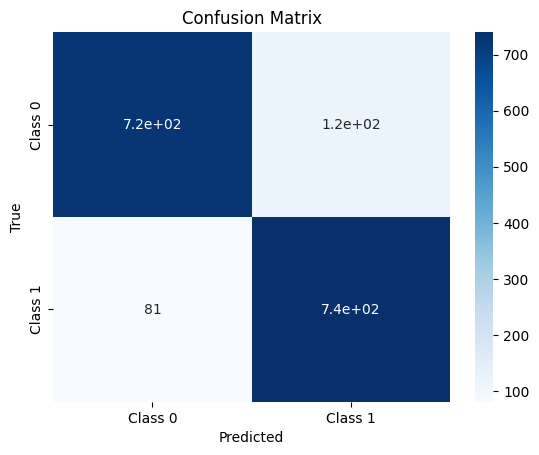

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['Class 0', 'Class 1']

# Create a heatmap plot of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [32]:
new_data_point_selected = np.array([0,1,1,1,0,0,0,1,1,0])
prediction = rf_model.predict([new_data_point_selected])

# Print the prediction
print(prediction)

[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Supoort Vector Machine Model by tuning Hyper Parameters**

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

target = 'copd'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Initialize the SVM model
model = SVC()

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score on the test set
print('Best Hyperparameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Best Hyperparameters: {'C': 10, 'class_weight': 'balanced', 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.8401442307692307
Precision: 0.8401442307692307
Recall: 0.8401442307692307
F1 Score: 0.8401442307692307


In [54]:
from sklearn.metrics import confusion_matrix

# Predict the target values for the test data
y_pred = grid_search.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[706 137]
 [129 692]]


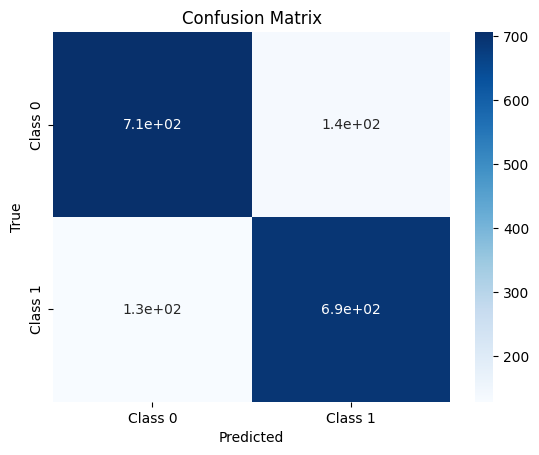

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['Class 0', 'Class 1']

# Create a heatmap plot of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

**Dumping the models in to a file**

In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_, 'svm_model.joblib')

['svm_model.joblib']

In [ ]:
import joblib
joblib.dump(rf_model,'rf_model.joblib')

['rf_model.joblib']